In [111]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [18]:
ctrl_max = pd.read_csv('data/ctrl_max.csv')
ctrl_min = pd.read_csv('data/ctrl_min.csv')
rcp_max = pd.read_csv('data/rcp_max.csv')
rcp_min = pd.read_csv('data/rcp_min.csv')

# set threshold at a value that occurs once every 10 years in control climate
tmax_threshold = ctrl_max.TREFHTMX.quantile(1-1/10/365.25)
tmax_threshold


311.114507759069

In [129]:
ctrl_max['month'] = [int(sub.split('-')[1]) for sub in ctrl_max.time]
ctrl_min['month'] = [int(sub.split('-')[1]) for sub in ctrl_min.time]
rcp_max['month'] = [int(sub.split('-')[1]) for sub in rcp_max.time]
rcp_min['month'] = [int(sub.split('-')[1]) for sub in rcp_min.time]

0          1
1          1
2          1
3          1
4          1
          ..
656629    12
656630    12
656631    12
656632    12
656633    12
Name: month, Length: 656634, dtype: int64

In [141]:
# get datasets to be summer and winter
ctrl_max_summer = ctrl_max[6<= ctrl_max['month']]
ctrl_max_summer = ctrl_max_summer[8>= ctrl_max_summer['month']]

ctrl_min_summer = ctrl_min[6<= ctrl_min['month']]
ctrl_min_summer = ctrl_min_summer[8>= ctrl_min_summer['month']]

rcp_max_summer = rcp_max[6<= rcp_max['month']]
rcp_max_summer = rcp_max_summer[8>= rcp_max_summer['month']]

rcp_min_summer = rcp_min[6<= rcp_min['month']]
rcp_min_summer = rcp_min_summer[8>= rcp_min_summer['month']]


ctrl_min_winter = ctrl_min[ctrl_min['month'] in [12, 1, 2]]

rcp_min_winter = rcp_min[rcp_min['month'] in [12, 1, 2]]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

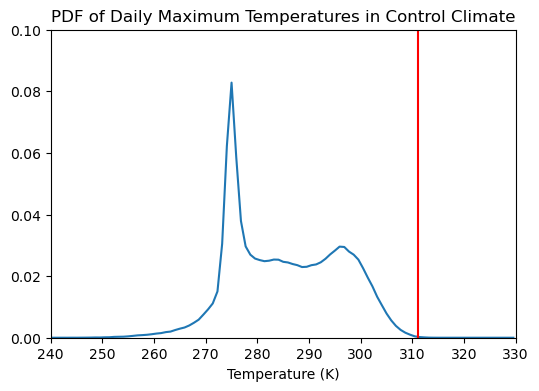

<Figure size 640x480 with 0 Axes>

In [145]:
# plot temperature distribution in control climate
bins = np.linspace(240, 330, 100)
histogram, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmax_threshold, color = 'r')
plt.title("PDF of Daily Maximum Temperatures in Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

In [20]:
# mean in historical climate
tmax_control_average = ctrl_max.TREFHTMX.mean()
tmax_control_average

285.22189775208113

In [21]:
# fraction of time above threshold in control climate
frac = len(ctrl_max.TREFHTMX[ctrl_max.TREFHTMX>tmax_threshold])/len(ctrl_max.TREFHTMX)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.0002741253118175422
occurs once every 9.987588409765001 years


<AxesSubplot: >

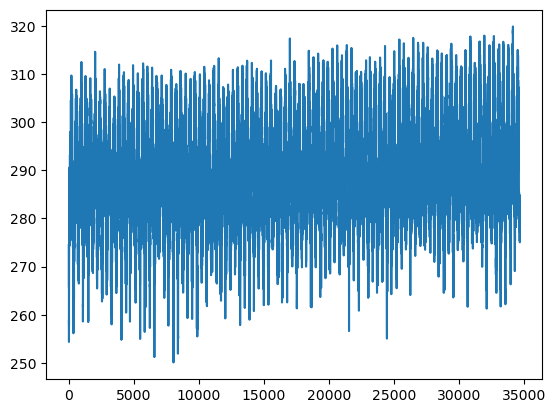

In [22]:
# look at timeseries of one model run in future
maxtemps_1 = rcp_max.TREFHTMX[rcp_max['member_id'] == 1]
maxtemps_1.plot()

In [96]:
# we'll look at last 20 years
rcp_max = rcp_max[rcp_max.time > '2081-01-01 12:00:00']
rcp_max

,member_id,time,lat,lon,TREFHTMX
27376,1,2081-01-02 12:00:00,49.47644,236.25,275.16858
27377,1,2081-01-03 12:00:00,49.47644,236.25,280.75934
27378,1,2081-01-04 12:00:00,49.47644,236.25,277.68463
27379,1,2081-01-05 12:00:00,49.47644,236.25,277.73572
27380,1,2081-01-06 12:00:00,49.47644,236.25,277.79782
...,...,...,...,...,...
1386995,105,2100-12-27 12:00:00,49.47644,236.25,285.86792
1386996,105,2100-12-28 12:00:00,49.47644,236.25,285.28580
1386997,105,2100-12-29 12:00:00,49.47644,236.25,285.49188
1386998,105,2100-12-30 12:00:00,49.47644,236.25,287.23053


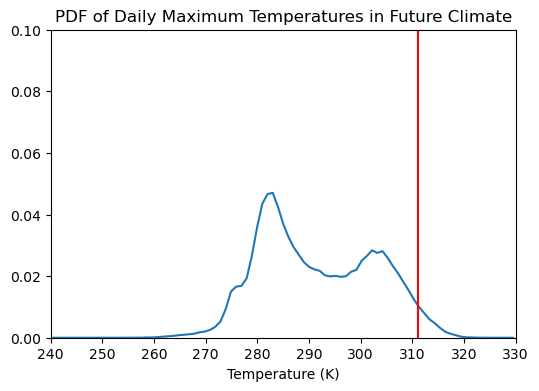

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the temperature distribution
# plot temperature distribution in control climate
bins = np.linspace(240, 330, 90)
histogram, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.title("PDF of Daily Maximum Temperatures in Future Climate")
plt.xlabel("Temperature (K)")
plt.axvline(x = tmax_threshold, color = 'r')
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

In [128]:
# frequency of extreme temperature in this modelled climate
frac = len(rcp_max.TREFHTMX[rcp_max.TREFHTMX>tmax_threshold])/len(rcp_max.TREFHTMX)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.03355596657076312
occurs once every 0.08159058036246691 years


27376      275.16858
27377      280.75934
27378      277.68463
27379      277.73572
27380      277.79782
             ...    
1386995    285.86792
1386996    285.28580
1386997    285.49188
1386998    287.23053
1386999    284.23868
Name: TREFHTMX, Length: 291960, dtype: float64

In [30]:
# what about if the max temp distribution hadn't changed, just shifted?
tmax_rcp_average = rcp_max.TREFHTMX.mean()
shift = tmax_rcp_average - tmax_control_average
print(tmax_rcp_average)
print(tmax_control_average)
shift

291.5097300629196
285.22189775208113


6.287832310838439

In [27]:
# just shift temps from control
tmax_control_shifted = ctrl_max.TREFHTMX + shift

# see frequency above threshold
frac = len(tmax_control_shifted[tmax_control_shifted>tmax_threshold])/len(tmax_control_shifted)
print("fraction of days above threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above threshold: 0.018721235878739147
occurs once every 0.1462430581434719 years


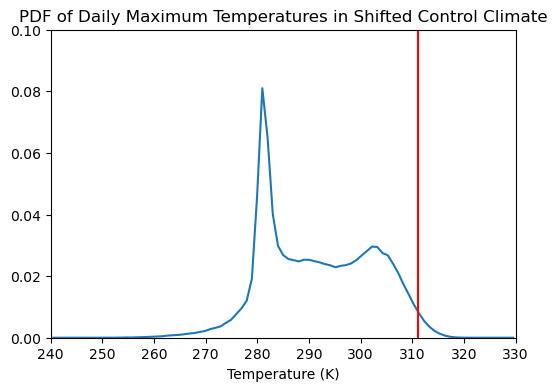

<Figure size 640x480 with 0 Axes>

In [33]:
# plot temperature distribution in shifted control climate
bins = np.linspace(240, 330, 90)
histogram, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmax_threshold, color = 'r')
plt.title("PDF of Daily Maximum Temperatures in Shifted Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()
plt.clf()

This is less often than the future modelled climate, suggesting climate change will increase the frequency of these events beyond just a shift in the temp distribution

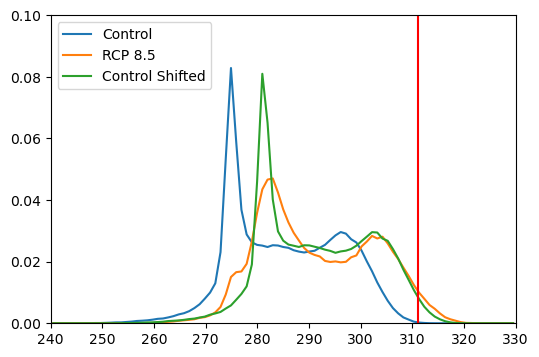

In [28]:
# we can plot all the distributions for visual comparison
bins = np.linspace(240, 330, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")

plt.legend()
plt.axvline(x = tmax_threshold, color = 'r')
plt.xlim([240, 330])
plt.ylim([0, .1])
plt.show()

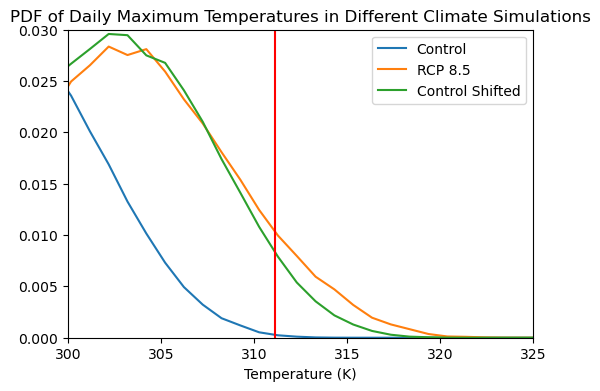

<Figure size 640x480 with 0 Axes>

In [47]:
# we can plot all the distributions for visual comparison
bins = np.linspace(240, 330, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_max.TREFHTMX, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_max.TREFHTMX, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmax_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")
plt.title("PDF of Daily Maximum Temperatures in Different Climate Simulations")
plt.xlabel("Temperature (K)")

plt.legend()
plt.axvline(x = tmax_threshold, color = 'r')


#Zoom in on the area of interest 
plt.xlim([300, 325])
plt.ylim([0, .03])
plt.show()
plt.clf()

In [87]:
#Counts for Chi squared:
a = len(tmax_control_shifted[tmax_control_shifted>tmax_threshold])
b = len(tmax_control_shifted) - len(tmax_control_shifted[tmax_control_shifted>tmax_threshold])
c = len(rcp_max.TREFHTMX[rcp_max.TREFHTMX>tmax_threshold])
d = len(rcp_max.TREFHTMX) - len(rcp_max.TREFHTMX[rcp_max.TREFHTMX>tmax_threshold])
print("shifted warmer: ", str(a))
print("shifted cooler: ", str(b))

print("future warmer: ", str(c))
print("future cooler: ", str(d))

obs = np.array([[a, b], [c, d]])
res = chi2_contingency(obs)
print(res.statistic)
print(res.pvalue)


shifted warmer:  6442
shifted cooler:  650192
future warmer:  9797
future cooler:  282163
6770.991795881235
0.0


 p = 0, so result is statistically significant https://www.socscistatistics.com/tests/chisquare/default2.aspx

In [42]:
#Even with a different threshold, we'd get the same result
#could try comparing CDFs for better visualization?

#idea: just look at summer. Shift might be different?

In [49]:
# same thing for min temps (do above and below threshold)
tmin_upper_threshold = ctrl_min.TREFHTMN.quantile(1-1/10/365.25)
tmin_lower_threshold = ctrl_min.TREFHTMN.quantile(1/10/365.25)

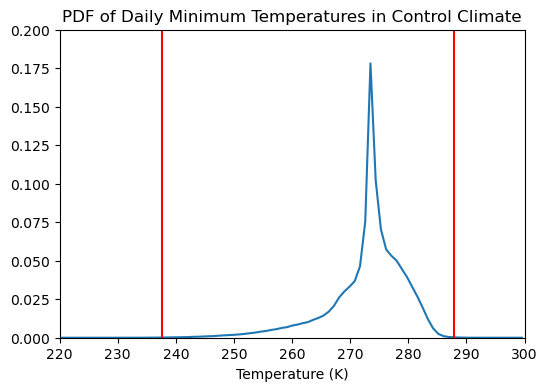

<Figure size 640x480 with 0 Axes>

In [52]:
# plot temperature distribution in control climate
bins = np.linspace(220, 300, 90)
histogram, bins = np.histogram(ctrl_min.TREFHTMN, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')
plt.title("PDF of Daily Minimum Temperatures in Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([220, 300])
plt.ylim([0, .2])
plt.show()
plt.clf()

In [53]:
# mean in historical climate
tmin_control_average = ctrl_min.TREFHTMN.mean()
tmin_control_average

272.9308969539653

In [55]:
# fraction of time above and below threshold in control climate
frac = len(ctrl_min.TREFHTMN[ctrl_min.TREFHTMN>tmin_upper_threshold])/len(ctrl_min.TREFHTMN)
print("fraction of days above upper threshold threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

frac = len(ctrl_min.TREFHTMN[ctrl_min.TREFHTMN<tmin_lower_threshold])/len(ctrl_min.TREFHTMN)
print("fraction of days below lower threshold threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above upper threshold threshold: 0.00027260239341855586
occurs once every 10.043384993059776 years
fraction of days above upper threshold threshold: 0.0002741253118175422
occurs once every 9.987588409765001 years


<AxesSubplot: >

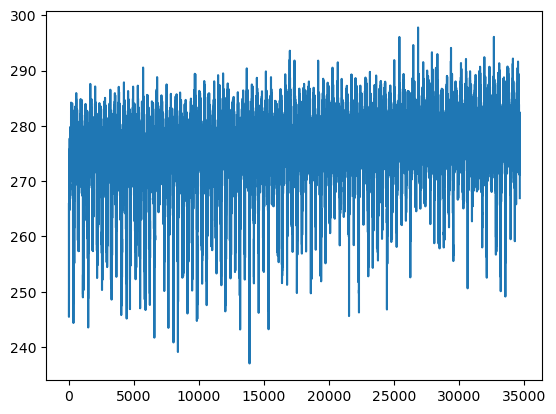

In [57]:
# look at timeseries of one model run in future
mintemps_1 = rcp_min.TREFHTMN[rcp_min['member_id'] == 1]
mintemps_1.plot()

In [58]:
# we'll look at last 20 years
rcp_min = rcp_min[rcp_min.time > '2081-01-01 12:00:00']

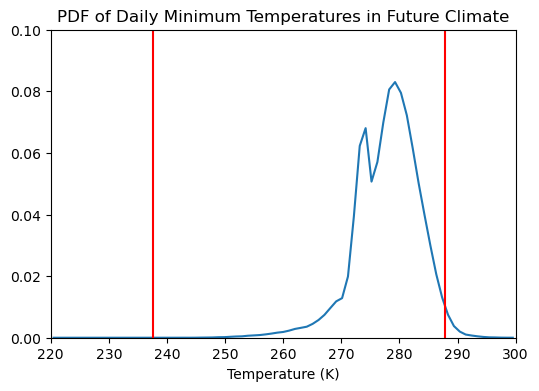

<Figure size 640x480 with 0 Axes>

In [59]:
# plot the temperature distribution
# plot temperature distribution in control climate
bins = np.linspace(220, 300, 80)
histogram, bins = np.histogram(rcp_min.TREFHTMN, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.title("PDF of Daily Minimum Temperatures in Future Climate")
plt.xlabel("Temperature (K)")
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')
plt.xlim([220, 300])
plt.ylim([0, .1])
plt.show()
plt.clf()

In [66]:
# frequency of extreme temperature in this modelled climate
frac = len(rcp_min.TREFHTMN[rcp_min.TREFHTMN>tmin_upper_threshold])/len(rcp_min.TREFHTMN)
print("fraction of days above upper threshold threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")
# frequency of extreme temperature in this modelled climate
frac = len(rcp_min.TREFHTMN[rcp_min.TREFHTMN<tmin_lower_threshold])/len(rcp_min.TREFHTMN)
print("fraction of days above below lower threshold: " + str(frac))
if frac > 0:
    years = 1/365.25/frac
    print("occurs once every " + str(years) + " years")
else:
    print('never occurs')

fraction of days above upper threshold threshold: 0.015481572818194273
occurs once every 0.17684577783431157 years
fraction of days above upper threshold threshold: 0.0
never occurs


In [62]:
# what about if the max temp distribution hadn't changed, just shifted?
tmin_rcp_average = rcp_min.TREFHTMN.mean()
shift = tmin_rcp_average - tmin_control_average
print(tmin_rcp_average)
print(tmin_control_average)
shift

277.87841825633643
272.9308969539653


4.947521302371115

In [64]:
# just shift temps from control
tmin_control_shifted = ctrl_min.TREFHTMN + shift

# see frequency above threshold
frac = len(tmin_control_shifted[tmin_control_shifted>tmin_upper_threshold])/len(tmin_control_shifted)
print("fraction of days above upper threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

# see frequency above threshold
frac = len(tmin_control_shifted[tmin_control_shifted<tmin_lower_threshold])/len(tmin_control_shifted)
print("fraction of days below lower threshold: " + str(frac))
years = 1/365.25/frac
print("occurs once every " + str(years) + " years")

fraction of days above upper threshold: 0.01955274932458569
occurs once every 0.14002382691468965 years
fraction of days below lower threshold: 3.1981286378713255e-05
occurs once every 85.60790065512857 years


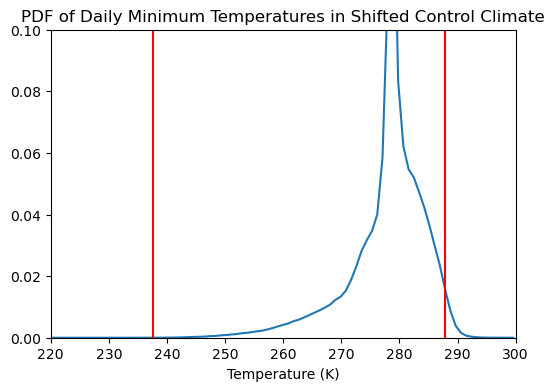

<Figure size 640x480 with 0 Axes>

In [67]:
# plot temperature distribution in shifted control climate
bins = np.linspace(220, 300, 90)
histogram, bins = np.histogram(tmin_control_shifted, bins=bins, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')
plt.title("PDF of Daily Minimum Temperatures in Shifted Control Climate")
plt.xlabel("Temperature (K)")
plt.xlim([220, 300])
plt.ylim([0, .1])
plt.show()
plt.clf()

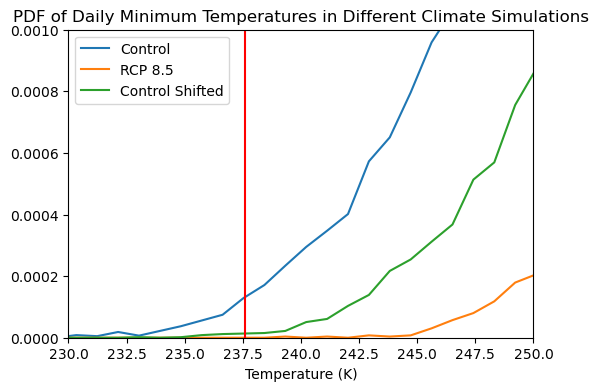

<Figure size 640x480 with 0 Axes>

In [73]:
# we can plot all the distributions for visual comparison
bins = np.linspace(220, 300, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_min.TREFHTMN, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_min.TREFHTMN, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmin_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")
plt.title("PDF of Daily Minimum Temperatures in Different Climate Simulations")
plt.xlabel("Temperature (K)")

plt.legend()
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')


#Zoom in on the area of interest 
plt.xlim([230, 250])
plt.ylim([0, .001])
plt.show()
plt.clf()

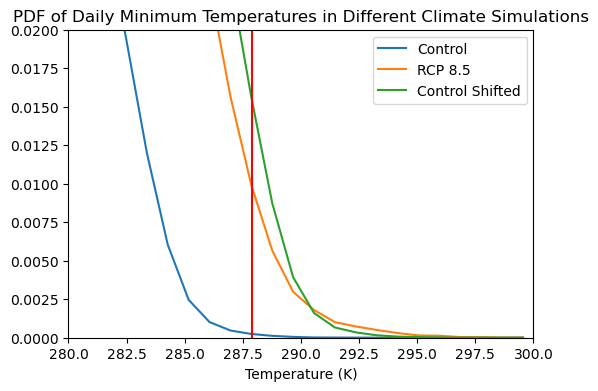

<Figure size 640x480 with 0 Axes>

In [76]:
# we can plot all the distributions for visual comparison
bins = np.linspace(220, 300, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_min.TREFHTMN, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_min.TREFHTMN, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmin_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")
plt.title("PDF of Daily Minimum Temperatures in Different Climate Simulations")
plt.xlabel("Temperature (K)")

plt.legend()
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')


#Zoom in on the area of interest 
plt.xlim([280, 300])
plt.ylim([0, .02])
plt.show()
plt.clf()

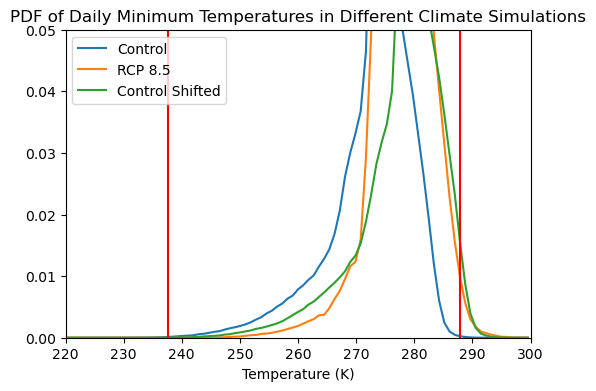

<Figure size 640x480 with 0 Axes>

In [78]:
# we can plot all the distributions for visual comparison
bins = np.linspace(220, 300, 90)
plt.figure(figsize=(6, 4))

histogram1, bins = np.histogram(ctrl_min.TREFHTMN, bins=bins, density=True)
bin1_centers = 0.5*(bins[1:] + bins[:-1])
pdf1 = stats.norm.pdf(bin1_centers)
plt.plot(bin1_centers, histogram1, label="Control")

histogram2, bins = np.histogram(rcp_min.TREFHTMN, bins=bins, density=True)
bin2_centers = 0.5*(bins[1:] + bins[:-1])
pdf2 = stats.norm.pdf(bin2_centers)
plt.plot(bin1_centers, histogram2, label="RCP 8.5")

histogram3, bins = np.histogram(tmin_control_shifted, bins=bins, density=True)
bin3_centers = 0.5*(bins[1:] + bins[:-1])
pdf3 = stats.norm.pdf(bin3_centers)
plt.plot(bin3_centers, histogram3, label="Control Shifted")
plt.title("PDF of Daily Minimum Temperatures in Different Climate Simulations")
plt.xlabel("Temperature (K)")

plt.legend()
plt.axvline(x = tmin_upper_threshold, color = 'r')
plt.axvline(x = tmin_lower_threshold, color = 'r')


#Zoom in on the area of interest 
plt.xlim([220, 300])
plt.ylim([0, .05])
plt.show()
plt.clf()

It looks like extreme cold is even less common in the RCP8.5 scenario than in the shifted control scenario. Meanwhile, it looks like somewhat extremely warm low temperatures are more likely in the shifted control climate and very extremely high low temperatures are more likely in the future climate. 

In [88]:
#Counts for Chi squared:
print("Warmer than Uppper threshold")
a = len(tmin_control_shifted[tmin_control_shifted>tmin_upper_threshold])
b = len(tmin_control_shifted) - len(tmin_control_shifted[tmin_control_shifted>tmin_upper_threshold])

c = len(rcp_min.TREFHTMN[rcp_min.TREFHTMN>tmin_upper_threshold])
d = len(rcp_min.TREFHTMN) - len(rcp_min.TREFHTMN[rcp_min.TREFHTMN>tmin_upper_threshold])


print("shifted warmer: ", str(a))
print("shifted cooler: ", str(b))

print("future warmer: ", str(c))
print("future cooler: ", str(d))

obs = np.array([[a, b], [c, d]])
res = chi2_contingency(obs)
print(res.statistic)
print(res.pvalue)

Warmer than Uppper threshold
shifted warmer:  12839
shifted cooler:  643795
future warmer:  4520
future cooler:  287440
186.2322838838557
2.1124403635115386e-42


In [93]:
#Counts for Chi squared:
print("Colder than lower threshold")
a = len(tmin_control_shifted[tmin_control_shifted<tmin_lower_threshold])
b = len(tmin_control_shifted) - len(tmin_control_shifted[tmin_control_shifted<tmin_lower_threshold])

c = len(rcp_min.TREFHTMN[rcp_min.TREFHTMN<tmin_lower_threshold])
d = len(rcp_min.TREFHTMN) - len(rcp_min.TREFHTMN[rcp_min.TREFHTMN<tmin_lower_threshold])

print("shifted warmer: ", str(a))
print("shifted cooler: ", str(b))

print("future warmer: ", str(c))
print("future cooler: ", str(d))

obs = np.array([[a, b], [c, d]])
res = chi2_contingency(obs)
print(res.statistic)
print(res.pvalue)

Colder than lower threshold
shifted warmer:  21
shifted cooler:  656613
future warmer:  0
future cooler:  291960
7.948678296762048
0.004812250842553426


So both results are statistically significant

TODO: do warms only in the summer, do cold only in the winter, do precip (only fall/winter). Also think about how to shift fall? Or just do the same way and that answer will be as expected (not physical for every day to be a little wetter like it is for every day to be a little warmer)

In [97]:
ctrl_pcp = pd.read_csv('data/20c_precip.csv')
rcp_pcp = pd.read_csv('data/rcp_precip.csv')

<AxesSubplot: >

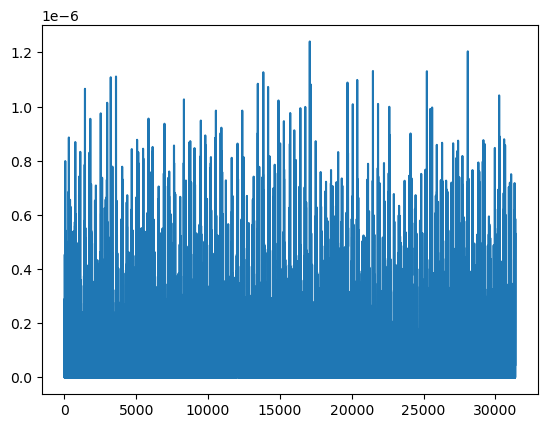

In [101]:
# look at timeseries of one model run in future
precip_1 = ctrl_pcp.PRECT[ctrl_pcp['member_id'] == 1]
precip_1.plot()

In [106]:
ctrl_pcp.time = pd.to_datetime(ctrl_pcp.time)
ctrl_pcp.time

0         1920-01-01 12:00:00
1         1920-01-02 12:00:00
2         1920-01-03 12:00:00
3         1920-01-04 12:00:00
4         1920-01-05 12:00:00
                  ...        
1255595   2005-12-27 12:00:00
1255596   2005-12-28 12:00:00
1255597   2005-12-29 12:00:00
1255598   2005-12-30 12:00:00
1255599   2005-12-31 12:00:00
Name: time, Length: 1255600, dtype: datetime64[ns]